# Perceptron 
#### (Artificial Neuron)

- A Perceptron is a single layer neural network
- It acts a Linear Classifier, Binary classification
- Loss Function : Binary Cross Entropy   
(-ve of Log Likelihood)
- Optimisation : Gradient Descent/ Stochastic Gradient Descent

### Learning Goals
- How to implement Perceptron?
- Understanding **Vectorization**,  
  writing efficient Code   
  without using for loop!  
- What is the meaning of "Linear Classifier"?

<img src= "images/w_b.jpg">

- The Bais adjusts the threshold value for the neuron for the neurons to fire.
- We can undersand it by like this that the neurons will fire if and only if the input is greater than or equal to zero.If we want the neuron to fire at input value of (-10)
then we will set the bias to (+10) making the total input equal to zero.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons,make_circles

### Generating Data

In [2]:
X,Y = make_blobs(n_samples=500, centers=2,n_features=2,random_state=1)
# X,Y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=1)
# X,Y=make_circles(n_samples=500,random_state=1)
print(X.shape,Y.shape)

(500, 2) (500,)


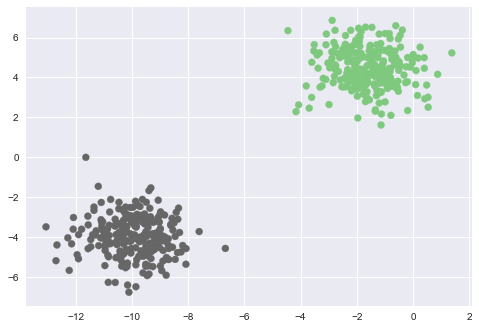

In [3]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.Accent)
plt.show()

In [4]:
## Data Normalization
x_mean=X.mean(axis=0);
x_std=X.std(axis=0)

X=(X-x_mean)/x_std

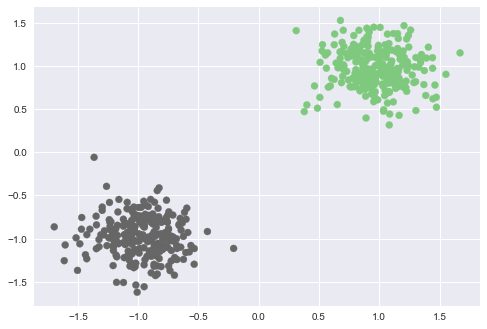

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.Accent)
plt.show()

## Model and helper functions

In [6]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

## Implement Perceptron Learning Algorithm
- Learn the weights
- Reduce the loss 
- Make the Preditctions

In [7]:
def predict(X,weights):
    """X -> mx(n+1) matrix, w -->(n+1,) vector
       z=np.dot(X,W) 
       Prediction:-sigmoid(z)
    """
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """Perform weight updates for 1 epoch"""
    Y_ = predict(X,weights)
    # Gradient (dj/dw)
    dw = np.dot(X.T,Y_ - Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

def train(X,Y,learning_rate=0.5,maxEpochs=1000):
    
    #Modify the input to handle the bias term (X0=1)
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    # After this step:-X(m*(n+1))
    
    #Init Weights 0 
    # while performning Gradient Descent we initialize any random value of weight
    weights = np.zeros(X.shape[1]) #n+1 entires
    
    #Iterate over all epochs and make updates
    for epoch in range(maxEpochs):
        
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
    return weights

In [8]:
weights = train(X,Y,learning_rate=0.8,maxEpochs=1000)

Epoch 0 Loss 0.3858
Epoch 10 Loss 0.0644
Epoch 20 Loss 0.0356
Epoch 30 Loss 0.0248
Epoch 40 Loss 0.0191
Epoch 50 Loss 0.0156
Epoch 60 Loss 0.0132
Epoch 70 Loss 0.0115
Epoch 80 Loss 0.0101
Epoch 90 Loss 0.0091
Epoch 100 Loss 0.0082
Epoch 110 Loss 0.0076
Epoch 120 Loss 0.0070
Epoch 130 Loss 0.0065
Epoch 140 Loss 0.0060
Epoch 150 Loss 0.0057
Epoch 160 Loss 0.0053
Epoch 170 Loss 0.0050
Epoch 180 Loss 0.0048
Epoch 190 Loss 0.0046
Epoch 200 Loss 0.0043
Epoch 210 Loss 0.0042
Epoch 220 Loss 0.0040
Epoch 230 Loss 0.0038
Epoch 240 Loss 0.0037
Epoch 250 Loss 0.0035
Epoch 260 Loss 0.0034
Epoch 270 Loss 0.0033
Epoch 280 Loss 0.0032
Epoch 290 Loss 0.0031
Epoch 300 Loss 0.0030
Epoch 310 Loss 0.0029
Epoch 320 Loss 0.0028
Epoch 330 Loss 0.0027
Epoch 340 Loss 0.0027
Epoch 350 Loss 0.0026
Epoch 360 Loss 0.0025
Epoch 370 Loss 0.0025
Epoch 380 Loss 0.0024
Epoch 390 Loss 0.0023
Epoch 400 Loss 0.0023
Epoch 410 Loss 0.0022
Epoch 420 Loss 0.0022
Epoch 430 Loss 0.0021
Epoch 440 Loss 0.0021
Epoch 450 Loss 0.0021

In [9]:
print(weights.shape)

(3,)


 
### Perceptron Implementation - Part-II 
- Make Predictions
- Visualise Decison Surface
- Linear vs Non-linear classification

In [10]:
def getPredictions(X_Test,weights,labels=True):
    # If (X0=1) is inserted in test data or not.
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))

    probs = predict(X_Test,weights)
    
    # If the user doesnot need labels
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [11]:
weights

array([-0.06594111, -3.97254155, -3.95698374])

In [12]:
# Here we have 2 features .Therefore our eqn is (W0+W1*x1+W2*X2=0)
x1 = np.linspace(-2,2,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

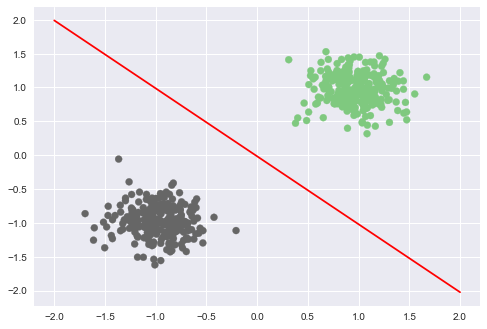

In [13]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [14]:
# Find the accuracy!
Y_ = getPredictions(X,weights,labels=True)
training_acc = np.sum(Y_==Y)/Y.shape[0]
print(training_acc)

1.0
